# Analise do dataset diurnas e noturnas

In [2]:
from pathlib import Path
CWD = Path.cwd()
PROJECT_ROOT = CWD.parent if CWD.name.lower() == 'notebooks' else CWD

## Diurnas 


In [3]:
# Analise de quantidade de Imagens diurnas dentro de dataset/Diurnas/train (busca recursiva)

IMAGE_EXTS = {'.jpg', '.jpeg', '.png'}
LABEL_EXTS = {'.txt'}

def list_files_recursive(root, exts):
    root_path = Path(root)
    return sorted(
        [p for p in root_path.rglob('*') if p.is_file() and p.suffix.lower() in exts],
        key=lambda p: p.as_posix(),
    )

def file_key(path, root):
    path = Path(path)
    root = Path(root)
    parts = [p for p in path.relative_to(root).parts if p not in ('images', 'labels')]
    parts[-1] = Path(parts[-1]).stem
    return Path(*parts).as_posix()

day_image_root = PROJECT_ROOT / 'data/Diurnas'
day_label_root = PROJECT_ROOT / 'data/Diurnas'
day_img_files = list_files_recursive(day_image_root, IMAGE_EXTS)
day_img_labels = list_files_recursive(day_label_root, LABEL_EXTS)

print(f'Quantidade de imagens diurnas dentro de {day_image_root}: {len(day_img_files)}')
print(f'Quantidade de labels diurnas dentro de {day_label_root}: {len(day_img_labels)}')


Quantidade de imagens diurnas dentro de c:\Users\GainTech0014\Documents\yolov8_model\data\Diurnas: 1788
Quantidade de labels diurnas dentro de c:\Users\GainTech0014\Documents\yolov8_model\data\Diurnas: 1788


In [4]:
# imagens diurnas de treino com labels correspondentes
day_img_keys = {file_key(p, day_image_root) for p in day_img_files}
day_label_keys = {file_key(p, day_label_root) for p in day_img_labels
}
day_imgs_with_labels = day_img_keys & day_label_keys
print(f'Quantidade de imagens diurnas de treino com labels correspondentes: {len(day_imgs_with_labels)}')

# nome das imagens sem labels e localização
day_imgs_without_labels = day_img_keys - day_label_keys
print(f'Quantidade de imagens diurnas de treino sem labels correspondentes: {len(day_imgs_without_labels)}')
for img_key in sorted(day_imgs_without_labels):
    print(f'- {img_key}')




Quantidade de imagens diurnas de treino com labels correspondentes: 1788
Quantidade de imagens diurnas de treino sem labels correspondentes: 0


Quantidade de imagens por classe nas labels diurnas:
Classe 0: 712 imagens
Classe 1: 325 imagens
Classe 2: 290 imagens
Classe BACKGROUND: 462 imagens

Porcentagem de imagens por classe nas labels diurnas:
Classe 0: 39.82%
Classe 1: 18.18%
Classe 2: 16.22%
Classe BACKGROUND: 25.84%


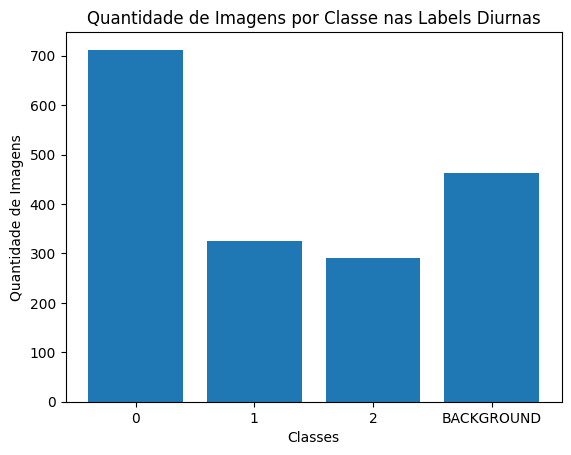

In [5]:
# Analise de quantidade de imagens por classe nas labels diurnas
day_class_counts = {}
for label_path in day_img_labels:
    with open(label_path, 'r') as f:
        lines = f.readlines()
        if not lines:
            class_id = 'BACKGROUND'
            day_class_counts[class_id] = day_class_counts.get(class_id, 0) + 1
        else:
            for line in lines:
                class_id = line.split()[0]
                day_class_counts[class_id] = day_class_counts.get(class_id, 0) + 1
print('Quantidade de imagens por classe nas labels diurnas:')
for class_id, count in day_class_counts.items():
    print(f'Classe {class_id}: {count} imagens')

# Em porcentagem
total_day_images = len(day_img_labels)
print('\nPorcentagem de imagens por classe nas labels diurnas:')
for class_id, count in day_class_counts.items():
    print(f'Classe {class_id}: {count / total_day_images * 100:.2f}%')

# Grafico de barras da quantidade de imagens por classe
import matplotlib.pyplot as plt
day_classes = list(day_class_counts.keys())
day_counts = list(day_class_counts.values())
plt.bar(day_classes, day_counts)
plt.xlabel('Classes')
plt.ylabel('Quantidade de Imagens')
plt.title('Quantidade de Imagens por Classe nas Labels Diurnas')
plt.show()


### Validacao Diurnas


In [22]:
# Analise de quantidade de Imagens diurnas dentro de dataset/Diurnas/valid (busca recursiva)
day_val_image_root = PROJECT_ROOT / 'Diurnas/valid'
day_val_label_root = PROJECT_ROOT / 'Diurnas/valid'
day_val_img_files = list_files_recursive(day_val_image_root, IMAGE_EXTS)
day_val_img_labels = list_files_recursive(day_val_label_root, LABEL_EXTS)

print(f'Quantidade de imagens diurnas dentro de {day_val_image_root}: {len(day_val_img_files)}')
print(f'Quantidade de labels diurnas dentro de {day_val_label_root}: {len(day_val_img_labels)}')


Quantidade de imagens diurnas dentro de c:\Users\GainTech0014\Documents\yolov8_model\Diurnas\valid: 383
Quantidade de labels diurnas dentro de c:\Users\GainTech0014\Documents\yolov8_model\Diurnas\valid: 383


In [23]:
# imagens diurnas de validacao com labels correspondentes
day_val_labeled_images = set(file_key(label, day_val_label_root) for label in day_val_img_labels)
print(f'Quantidade de imagens diurnas de validacao com labels correspondentes: {len(day_val_labeled_images)}')

# nome das imagens sem labels
day_val_unlabeled_images = [
    img for img in day_val_img_files
    if file_key(img, day_val_image_root) not in day_val_labeled_images
]
print('Nomes das imagens diurnas de validacao sem labels correspondentes:')
for img in day_val_unlabeled_images:
    print(img.relative_to(day_val_image_root))


Quantidade de imagens diurnas de validacao com labels correspondentes: 383
Nomes das imagens diurnas de validacao sem labels correspondentes:


Quantidade de imagens por classe nas labels diurnas de Validacao:
Classe 1: 78 imagens
Classe 0: 166 imagens
Classe BACKGROUND: 116 imagens
Classe 2: 23 imagens

Porcentagem de imagens por classe nas labels diurnas de Validacao:
Classe 1: 20.37%
Classe 0: 43.34%
Classe BACKGROUND: 30.29%
Classe 2: 6.01%


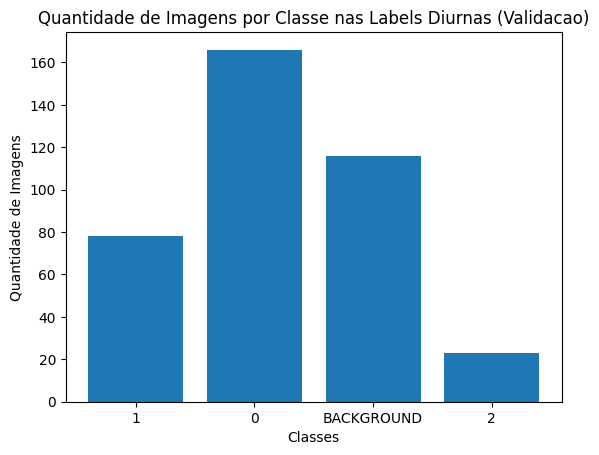

In [24]:
# Analise de quantidade de imagens por classe nas labels diurnas de Validacao (se o LABEL for VAZIO entao classe = BACKGROUND)
day_val_class_counts = {}
for label_path in day_val_img_labels:
    with open(label_path, 'r') as f:
        lines = f.readlines()
        if not lines:
            class_id = 'BACKGROUND'
            day_val_class_counts[class_id] = day_val_class_counts.get(class_id, 0) + 1
        else:
            for line in lines:
                class_id = line.split()[0]
                day_val_class_counts[class_id] = day_val_class_counts.get(class_id, 0) + 1
print('Quantidade de imagens por classe nas labels diurnas de Validacao:')
for class_id, count in day_val_class_counts.items():
    print(f'Classe {class_id}: {count} imagens')

# Em porcentagem
total_day_val_images = len(day_val_img_labels)
print('\nPorcentagem de imagens por classe nas labels diurnas de Validacao:')
for class_id, count in day_val_class_counts.items():
    print(f'Classe {class_id}: {count / total_day_val_images * 100:.2f}%')

# Grafico de barras da quantidade de imagens por classe
import matplotlib.pyplot as plt
day_val_classes = list(day_val_class_counts.keys())
day_val_counts = list(day_val_class_counts.values())
plt.bar(day_val_classes, day_val_counts)
plt.xlabel('Classes')
plt.ylabel('Quantidade de Imagens')
plt.title('Quantidade de Imagens por Classe nas Labels Diurnas (Validacao)')
plt.show()


Total de imagens diurnas (treino + validacao): 1788

Quantidade conjunta de imagens por classe nas labels diurnas (treino + validacao):
Classe 0: 712 imagens
Classe 1: 325 imagens
Classe 2: 290 imagens
Classe BACKGROUND: 462 imagens

Porcentagem conjunta de imagens por classe nas labels diurnas (treino+ validacao):
Classe 0: 39.82%
Classe 1: 18.18%
Classe 2: 16.22%
Classe BACKGROUND: 25.84%


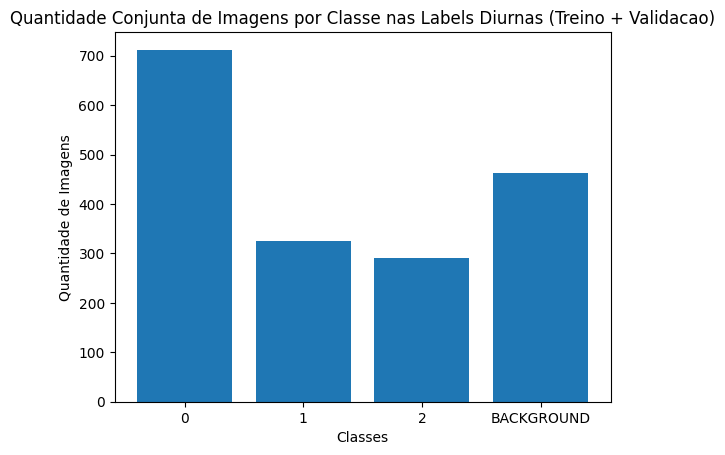

In [25]:
# analise conjunta de treino + validacao diurnas
total_day_images_combined = total_day_images + total_day_val_images
print(f'Total de imagens diurnas (treino + validacao): {total_day_images_combined}')

# analise conjunta de quantidade por classe (treino + validacao)
combined_day_class_counts = day_class_counts.copy()
for class_id, count in day_val_class_counts.items():
    combined_day_class_counts[class_id] = combined_day_class_counts.get(class_id, 0) + count
print('\nQuantidade conjunta de imagens por classe nas labels diurnas (treino + validacao):')
for class_id, count in combined_day_class_counts.items():
    print(f'Classe {class_id}: {count} imagens')    

# Em porcentagem conjunta
print('\nPorcentagem conjunta de imagens por classe nas labels diurnas (treino+ validacao):')
for class_id, count in combined_day_class_counts.items():
    print(f'Classe {class_id}: {count / total_day_images_combined * 100:.2f}%')

# Grafico de barras da quantidade conjunta de imagens por classe
import matplotlib.pyplot as plt

combined_day_classes = list(combined_day_class_counts.keys())
combined_day_counts = list(combined_day_class_counts.values())
plt.bar(combined_day_classes, combined_day_counts)
plt.xlabel('Classes')
plt.ylabel('Quantidade de Imagens')
plt.title('Quantidade Conjunta de Imagens por Classe nas Labels Diurnas (Treino + Validacao)')
plt.show()


## Noturnas


In [26]:
# Analise de quantidade de Imagens noturnas dentro de dataset/Noturnas/train (busca recursiva)
noct_image_root = PROJECT_ROOT / 'dataset/Noturnas/train'
noct_label_root = PROJECT_ROOT / 'dataset/Noturnas/train'
noct_img_files = list_files_recursive(noct_image_root, IMAGE_EXTS)
noct_img_labels = list_files_recursive(noct_label_root, LABEL_EXTS)    

print(f'Quantidade de imagens noturnas dentro de {noct_image_root}: {len(noct_img_files)}')
print(f'Quantidade de labels noturnas dentro de {noct_label_root}: {len(noct_img_labels)}')


Quantidade de imagens noturnas dentro de c:\Users\GainTech0014\Documents\yolov8_model\dataset\Noturnas\train: 977
Quantidade de labels noturnas dentro de c:\Users\GainTech0014\Documents\yolov8_model\dataset\Noturnas\train: 977


In [27]:
# imagens noturnas com labels correspondentes
noct_labeled_images = set(file_key(label, noct_label_root) for label in noct_img_labels)
print(f'Quantidade de imagens noturnas com labels correspondentes: {len(noct_labeled_images)}')

# nome das imagens sem labels
noct_unlabeled_images = [
    img for img in noct_img_files
    if file_key(img, noct_image_root) not in noct_labeled_images
]
print('Nomes das imagens noturnas sem labels correspondentes:')
for img in noct_unlabeled_images:
    print(img.relative_to(noct_image_root))


Quantidade de imagens noturnas com labels correspondentes: 977
Nomes das imagens noturnas sem labels correspondentes:


Quantidade de imagens por classe nas labels noturnas:
Classe 0: 269 imagens
Classe 1: 236 imagens
Classe 2: 80 imagens
Classe BACKGROUND: 392 imagens

Porcentagem de imagens por classe nas labels noturnas:
Classe 0: 27.53%
Classe 1: 24.16%
Classe 2: 8.19%
Classe BACKGROUND: 40.12%


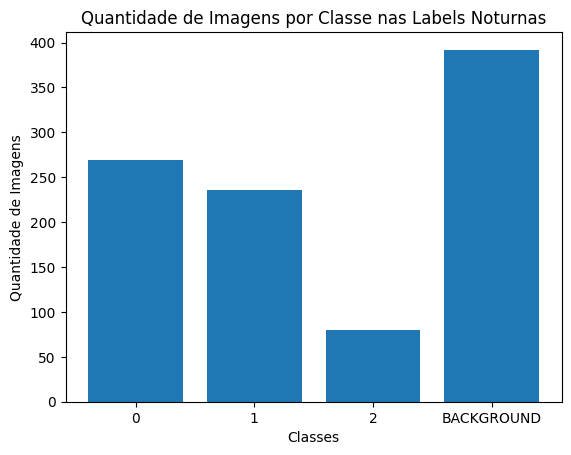

In [28]:
# Analise de quantidade de imagens por classe nas labels noturnas
noct_class_counts = {}
for label_path in noct_img_labels:
    with open(label_path, 'r') as f:
        lines = f.readlines()
        if not lines:
            class_id = 'BACKGROUND'
            noct_class_counts[class_id] = noct_class_counts.get(class_id, 0) + 1
        else:
            for line in lines:
                class_id = line.split()[0]
                noct_class_counts[class_id] = noct_class_counts.get(class_id, 0) + 1
print('Quantidade de imagens por classe nas labels noturnas:')
for class_id, count in noct_class_counts.items():
    print(f'Classe {class_id}: {count} imagens')

# Em porcentagem
total_noct_images = len(noct_img_labels)
print('\nPorcentagem de imagens por classe nas labels noturnas:')
for class_id, count in noct_class_counts.items():
    print(f'Classe {class_id}: {count / total_noct_images * 100:.2f}%')

# Grafico de barras da quantidade de imagens por classe
import matplotlib.pyplot as plt
noct_classes = list(noct_class_counts.keys())
noct_counts = list(noct_class_counts.values())
plt.bar(noct_classes, noct_counts)
plt.xlabel('Classes')
plt.ylabel('Quantidade de Imagens')
plt.title('Quantidade de Imagens por Classe nas Labels Noturnas')
plt.show()


### Validacao Noturnas


In [29]:
# Analise de quantidade de Imagens noturnas dentro de dataset/Noturnas/valid (busca recursiva)
noct_val_image_root = PROJECT_ROOT / 'dataset/Noturnas/valid'
noct_val_label_root = PROJECT_ROOT / 'dataset/Noturnas/valid'
noct_val_img_files = list_files_recursive(noct_val_image_root, IMAGE_EXTS)
noct_val_img_labels = list_files_recursive(noct_val_label_root, LABEL_EXTS)

print(f'Quantidade de imagens noturnas dentro de {noct_val_image_root}: {len(noct_val_img_files)}')
print(f'Quantidade de labels noturnas dentro de {noct_val_label_root}: {len(noct_val_img_labels)}')


Quantidade de imagens noturnas dentro de c:\Users\GainTech0014\Documents\yolov8_model\dataset\Noturnas\valid: 318
Quantidade de labels noturnas dentro de c:\Users\GainTech0014\Documents\yolov8_model\dataset\Noturnas\valid: 318


In [30]:
# imagens noturnas de validacao com labels correspondentes
noct_val_labeled_images = set(file_key(label, noct_val_label_root) for label in noct_val_img_labels)
print(f'Quantidade de imagens noturnas de validacao com labels correspondentes: {len(noct_val_labeled_images)}')

# nome das imagens sem labels
noct_val_unlabeled_images = [
    img for img in noct_val_img_files
    if file_key(img, noct_val_image_root) not in noct_val_labeled_images
]
print('Nomes das imagens noturnas de validacao sem labels correspondentes:')
for img in noct_val_unlabeled_images:
    print(img.relative_to(noct_val_image_root))


Quantidade de imagens noturnas de validacao com labels correspondentes: 318
Nomes das imagens noturnas de validacao sem labels correspondentes:


Quantidade de imagens por classe nas labels noturnas de Validacao:
Classe 0: 99 imagens
Classe 1: 70 imagens
Classe 2: 19 imagens
Classe BACKGROUND: 130 imagens

Porcentagem de imagens por classe nas labels noturnas de Validacao:
Classe 0: 31.13%
Classe 1: 22.01%
Classe 2: 5.97%
Classe BACKGROUND: 40.88%


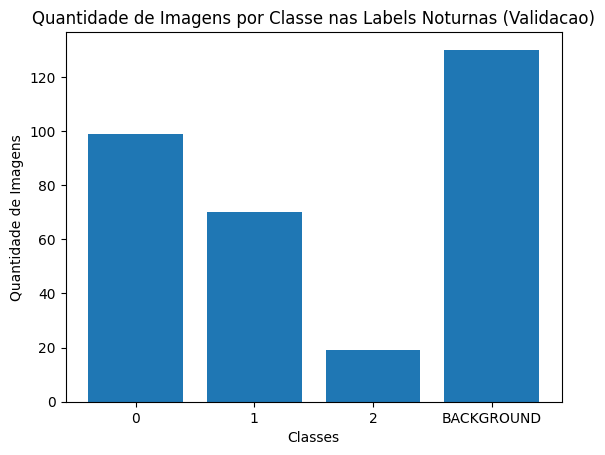

In [31]:
# An?lise de quantidade de imagens por classe nas labels noturnas de Validacao (se o LABEL for VAZIO ent?o classe = BACKGROUND)
noct_val_class_counts = {}
for label_path in noct_val_img_labels:
    with open(label_path, 'r') as f:
        lines = f.readlines()
        if not lines:
            class_id = 'BACKGROUND'
            noct_val_class_counts[class_id] = noct_val_class_counts.get(class_id, 0) + 1
        else:
            for line in lines:
                class_id = line.split()[0]
                noct_val_class_counts[class_id] = noct_val_class_counts.get(class_id, 0) + 1
print('Quantidade de imagens por classe nas labels noturnas de Validacao:')
for class_id, count in noct_val_class_counts.items():
    print(f'Classe {class_id}: {count} imagens')

# Em porcentagem
total_noct_val_images = len(noct_val_img_labels)
print('\nPorcentagem de imagens por classe nas labels noturnas de Validacao:')
for class_id, count in noct_val_class_counts.items():
    print(f'Classe {class_id}: {count / total_noct_val_images * 100:.2f}%')

# Grafico de barras da quantidade de imagens por classe
import matplotlib.pyplot as plt
noct_val_classes = list(noct_val_class_counts.keys())
noct_val_counts = list(noct_val_class_counts.values())
plt.bar(noct_val_classes, noct_val_counts)
plt.xlabel('Classes')
plt.ylabel('Quantidade de Imagens')
plt.title('Quantidade de Imagens por Classe nas Labels Noturnas (Validacao)')
plt.show()


Total de imagens noturnas (treino + validacao): 1295

Quantidade conjunta de imagens por classe nas labels noturnas (treino + validacao):
Classe 0: 368 imagens
Classe 1: 306 imagens
Classe 2: 99 imagens
Classe BACKGROUND: 522 imagens

Porcentagem conjunta de imagens por classe nas labels noturnas (treino+ validacao):
Classe 0: 28.42%
Classe 1: 23.63%
Classe 2: 7.64%
Classe BACKGROUND: 40.31%


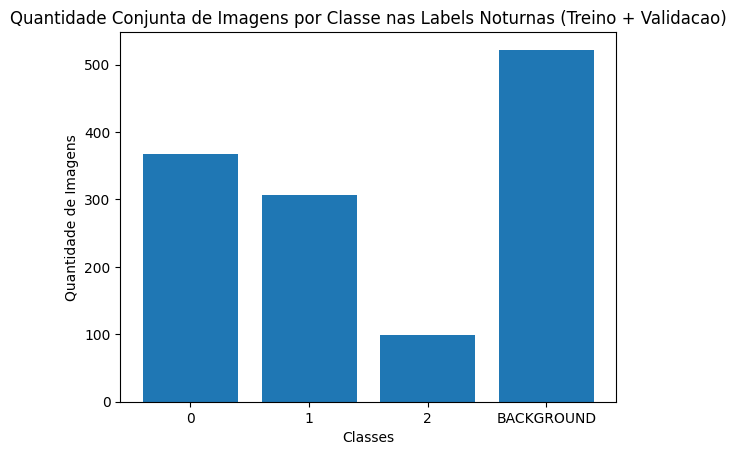

In [32]:
# analise conjunta de treino + validacao noturnas
total_noct_images_combined = total_noct_images + total_noct_val_images
print(f'Total de imagens noturnas (treino + validacao): {total_noct_images_combined}')

# analise conjunta de quantidade por classe (treino + validacao)
combined_noct_class_counts = noct_class_counts.copy()
for class_id, count in noct_val_class_counts.items():
    combined_noct_class_counts[class_id] = combined_noct_class_counts.get(class_id, 0) + count
print('\nQuantidade conjunta de imagens por classe nas labels noturnas (treino + validacao):')
for class_id, count in combined_noct_class_counts.items():
    print(f'Classe {class_id}: {count} imagens')

# Em porcentagem conjunta
print('\nPorcentagem conjunta de imagens por classe nas labels noturnas (treino+ validacao):')
for class_id, count in combined_noct_class_counts.items():
    print(f'Classe {class_id}: {count / total_noct_images_combined * 100:.2f}%')
# Grafico de barras da quantidade conjunta de imagens por classe

import matplotlib.pyplot as plt
combined_noct_classes = list(combined_noct_class_counts.keys())
combined_noct_counts = list(combined_noct_class_counts.values())
plt.bar(combined_noct_classes, combined_noct_counts)
plt.xlabel('Classes')
plt.ylabel('Quantidade de Imagens')
plt.title('Quantidade Conjunta de Imagens por Classe nas Labels Noturnas (Treino + Validacao)')
plt.show()